# THT3
## Part 2
## Table of Contents:
* [Problem (a)](#(a))
* [Problem (b)](#(b))
* [Problem (c)](#(c))
* [Problem (d)](#(d))
* [Problem (e)](#(e))
* [Problem (f)](#(f))
* [Problem (h)](#(h))
* [Problem (i)](#(i))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('stat-206-mushroom-data-2.csv').drop(columns=['veil-type'])

In [3]:
# Summary of missing values
df.replace('?', np.nan).isna().sum()

poisonous                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df['poisonous'] = np.where((df['poisonous']=='p'), 1, 0).astype(int)
df.iloc[:, 1:] = df.iloc[:, 1:].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   poisonous                 8124 non-null   int64   
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

<AxesSubplot:xlabel='poisonous', ylabel='count'>

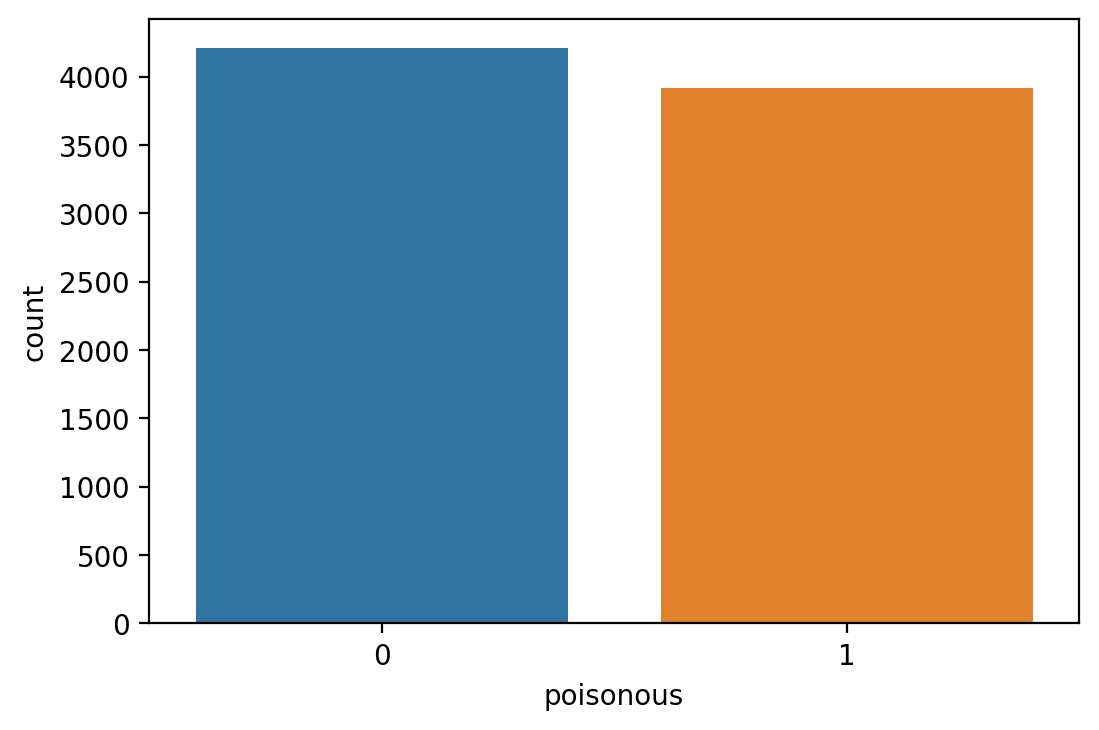

In [6]:
fig, ax = plt.subplots(dpi=200)
sns.countplot(x='poisonous', ax=ax, data=df)

# (a)
* [back to top](#THT3)

**Cap shapes:**
- b: bell
- c: conical
- f: flat
- k: knobbed
- s: sunken
- x: convex

In [7]:
df.groupby('cap-shape')['poisonous'].agg(['count', 'mean', 'std'])

,count,mean,std
cap-shape,,,
b,452,0.106195,0.308428
c,4,1.000000,0.000000
f,3152,0.493655,0.500039
k,828,0.724638,0.446967
s,32,0.000000,0.000000
x,3656,0.467177,0.498990


# (b)
* [back to top](#THT3)

In [8]:
cap_shape = pd.get_dummies(df['cap-shape'])
cap_shape.iloc[:, 0] = 1
cap_shape['poisonous'] = df['poisonous']
cap_shape = cap_shape.rename(columns={'b':'beta0'})
cap_shape.head()

,beta0,c,f,k,s,x,poisonous
0,1,0,0,0,0,1,1
1,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,1,1
4,1,0,0,0,0,1,0


In [9]:
X = cap_shape.iloc[:, :6].values
y = cap_shape.iloc[:, 6].values.ravel()

In [10]:
lm = sm.OLS(y, X)
res = lm.fit()

In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     104.2
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          6.54e-107
Time:                        23:11:39   Log-Likelihood:                -5638.4
No. Observations:                8124   AIC:                         1.129e+04
Df Residuals:                    8118   BIC:                         1.133e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1062      0.023      4.659      0.000       0.062       0.151
x1             0.8938      0.243      3.673      0.000       0.417       1.371
x2             0.3875      0.024     15.898      0.000       0.340       0.435
x3             0.6184      0.028     21.824      0.000       0.563       0.674
x4            -0.1062      0.089     -1.198      0.231      -0.280       0.068
x5             0.3610      0.024     14.942      0.000       0.314       0.408
==============================================================================
Omnibus:                    31427.835   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1131.369
Skew:                           0.032   Prob(JB):                    2.12e-246
Kurtosis:                       1.173   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (c)
* [back to top](#THT3)

In [12]:
p_hat = res.predict(X)
df['p_hat'] = p_hat

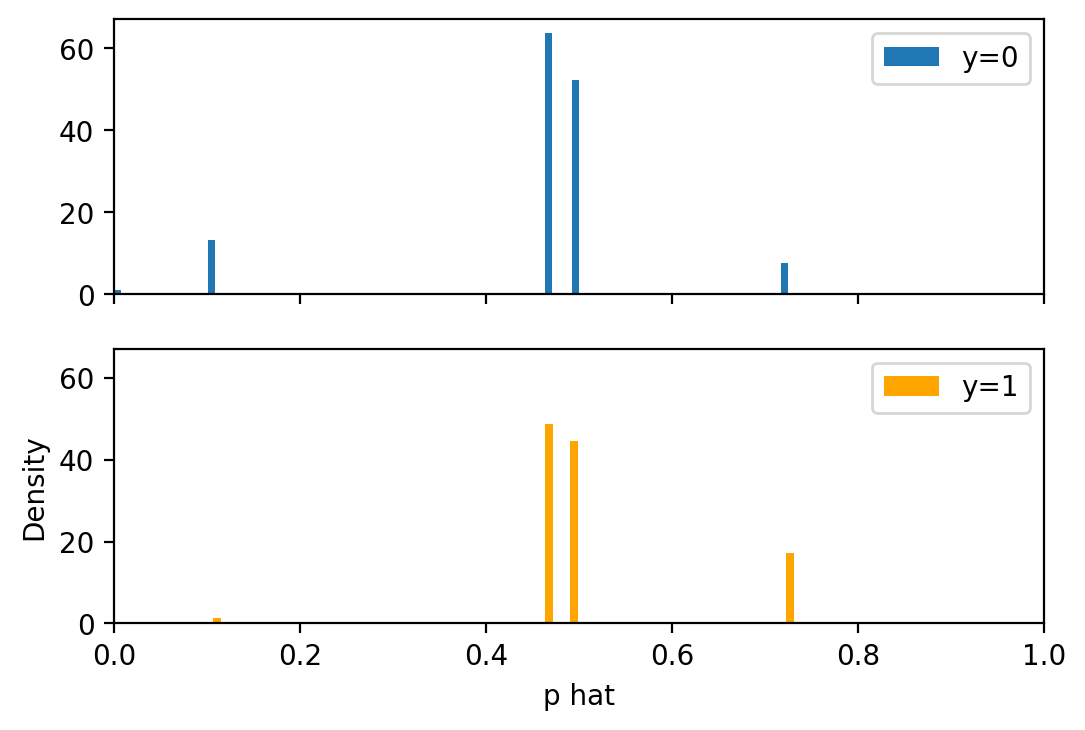

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, dpi=200)
plt.xlim([0,1])
plt.xlabel('p hat')
plt.ylabel('Density')
ax1.hist(x='p_hat',
         bins=100,
         label='y=0',
         density=True,
         data=df.loc[df['poisonous']==0])

ax2.hist(x='p_hat',
         bins=100,
         label='y=1',
         color='orange',
         density=True,
         data=df.loc[df['poisonous']==1])

ax1.legend()
ax2.legend()

In [14]:
psi = (df.loc[df['poisonous']==1]['p_hat'].mean()) - (df.loc[df['poisonous']==0]['p_hat'].mean())
print('Cap-shape PSI: {:.4f}'.format(psi))

Cap-shape PSI: 0.0603


# (d)
* [back to top](#THT3)

In [15]:
def univariate_exploration(df, predictor, y):
    from statsmodels.api import OLS
    data = pd.get_dummies(df.loc[:, predictor])
    data.iloc[:, 0] = 1
    X = data.values
    lm = OLS(y, X)
    res = lm.fit()
    p_hat = res.predict(X)

    data['y'] = y
    data['p_hat'] = np.abs(p_hat.round(5))

    psi = (data.loc[data['y']==1]['p_hat'].mean()) \
            - (data.loc[data['y']==0]['p_hat'].mean())
    
    return psi, res, data

In [16]:
def psi_table(df, predictors, y):
    """
    df: data-frame
    predictors: list of predictors in string format (column labels)
    y: true value
    
    returns table of psi values for each predictor
    """
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    p_psi = []
    for p in predictors:
        data = pd.get_dummies(df.loc[:, p])
        data.iloc[:, 0] = 1
        X = data.values
        lm.fit(X, y)
        p_hat = lm.predict(X)
        
        data['y'] = y
        data['p_hat'] = p_hat
        
        psi = (data.loc[data['y']==1]['p_hat'].mean()) \
                - (data.loc[data['y']==0]['p_hat'].mean())
        p_psi.append((p, psi))
        
    psi_dict = dict(p_psi)
        
    return pd.DataFrame.from_dict(psi_dict, orient='index', columns=['PSI'])

In [17]:
predictor_list = list(df.iloc[:, 1:-1].columns)
psi_df = psi_table(df, predictor_list, y)
psi_df['Predictive Power'] = pd.cut(psi_df['PSI'], bins=5, labels=['almost none',
                                                                 'weak',
                                                                 'moderate',
                                                                 'strong',
                                                                 'extremely strong'])
psi_df.sort_values('PSI', ascending=False).round(4)

,PSI,Predictive Power
odor,0.9429,extremely strong
spore-print-color,0.5665,moderate
gill-color,0.4635,moderate
ring-type,0.3639,weak
stalk-surface-above-ring,0.3457,weak
stalk-surface-below-ring,0.3304,weak
gill-size,0.2916,weak
stalk-color-above-ring,0.2755,weak
stalk-color-below-ring,0.2649,weak
bruises,0.2515,weak


# (e)
* [back to top](#THT3)

In [18]:
psi, res_cs, _ = univariate_exploration(df, 'cap-surface', y)
print(psi)
print(res_cs.summary())

0.03877856845463912
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           2.60e-69
Time:                        23:11:41   Log-Likelihood:                -5730.4
No. Observations:                8124   AIC:                         1.147e+04
Df Residuals:                    8120   BIC:                         1.150e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3276      0.010

In [19]:
psi, res_cs, _ = univariate_exploration(df, 'odor', y)
print(psi)
print(res_cs.summary())

0.9428544515820847
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.674e+04
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:11:41   Log-Likelihood:                 5734.8
No. Observations:                8124   AIC:                        -1.145e+04
Df Residuals:                    8115   BIC:                        -1.139e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.166e-15      0.006 

# (f)
* [back to top](#THT3)

In [20]:
full_dummies = df.iloc[:, :-1].rename(columns={'poisonous':'intercept'})
full_dummies.iloc[:, 0] = 1
full_dummies = pd.get_dummies(full_dummies, drop_first=True)

In [21]:
lm = sm.OLS(y, full_dummies)
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.243e+29
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:11:41   Log-Likelihood:             2.5360e+05
No. Observations:                8124   AIC:                        -5.070e+05
Df Residuals:                    8038   BIC:                        -5.064e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept           

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, random_state=206, shuffle=True)
lm = LinearRegression()

In [23]:
scores = cross_val_score(lm, full_dummies, y, scoring='r2', cv=kf, n_jobs=-1)
print('R^2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

R^2: 1.000 (0.000)


In [24]:
scores = cross_val_score(lm, full_dummies, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
scores = np.sqrt(-scores)
print(f'RMSE: {np.sqrt((1/len(scores)*np.sum(scores**2)))}')


RMSE: 1.77796940586448e-15


# (h)
* [back to top](#THT3)

In [25]:
psi_odor, res_odor, odor = univariate_exploration(df, 'odor', y)
res_odor.summary()
odor['y'] = y

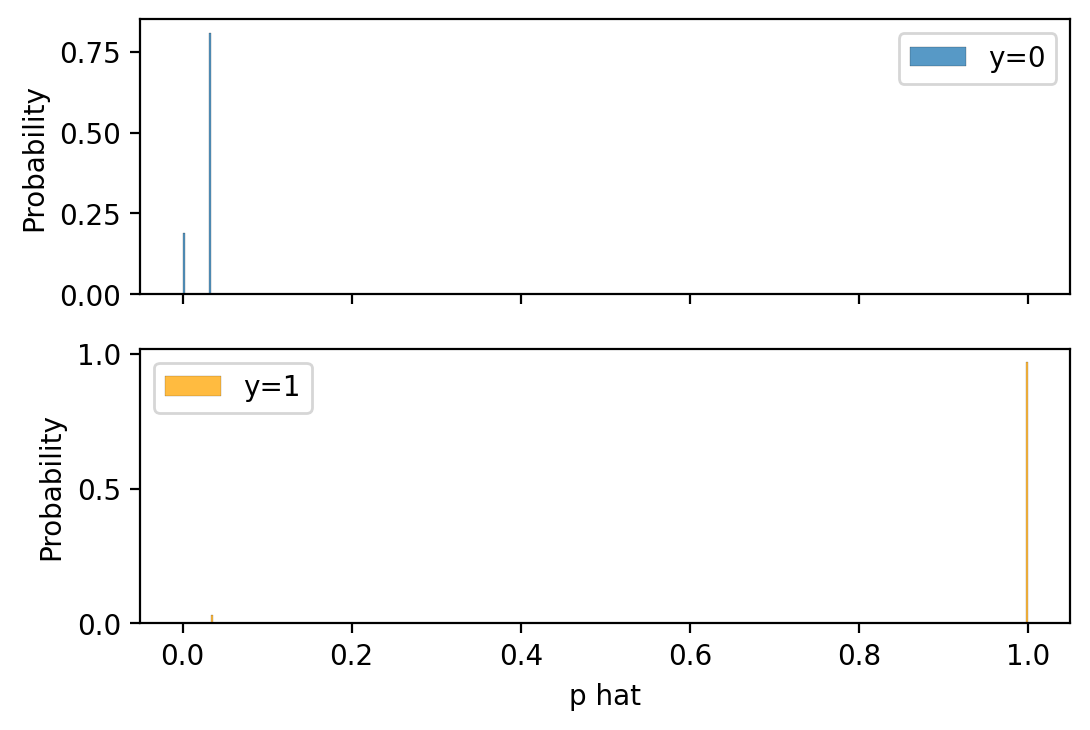

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, dpi=200)
plt.xlim([-0.05,1.05])
plt.xlabel('p hat')
sns.histplot(x='p_hat',
                label='y=0',
                stat='probability',
                ax=ax1,
                data=odor.loc[odor['y']==0])

sns.histplot(x='p_hat',
                label='y=1',
                stat='probability', bins=500,
                ax=ax2, color='orange',
                data=odor.loc[odor['y']==1])

ax1.legend()
ax2.legend()

In [27]:
odor['p_hat'].value_counts()

1.00000    3796
0.03401    3528
0.00000     800
Name: p_hat, dtype: int64

In [28]:
odor.loc[odor['y']==0]['p_hat'].value_counts()

0.03401    3408
0.00000     800
Name: p_hat, dtype: int64

In [29]:
odor['p > 0.01'] = np.where((odor['p_hat'] > 0.01), 1, 0)
odor['p > 0.05'] = np.where((odor['p_hat'] > 0.05), 1, 0)
odor.head()

,a,c,f,l,m,n,p,s,y,p_hat,p > 0.01,p > 0.05
0,1,0,0,0,0,0,1,0,1,1.00000,1,1
1,1,0,0,0,0,0,0,0,0,0.00000,0,0
2,1,0,0,1,0,0,0,0,0,0.00000,0,0
3,1,0,0,0,0,0,1,0,1,1.00000,1,1
4,1,0,0,0,0,1,0,0,0,0.03401,1,0


Text(0.5, 1.0, '0.05 cut-off confusion matrix')

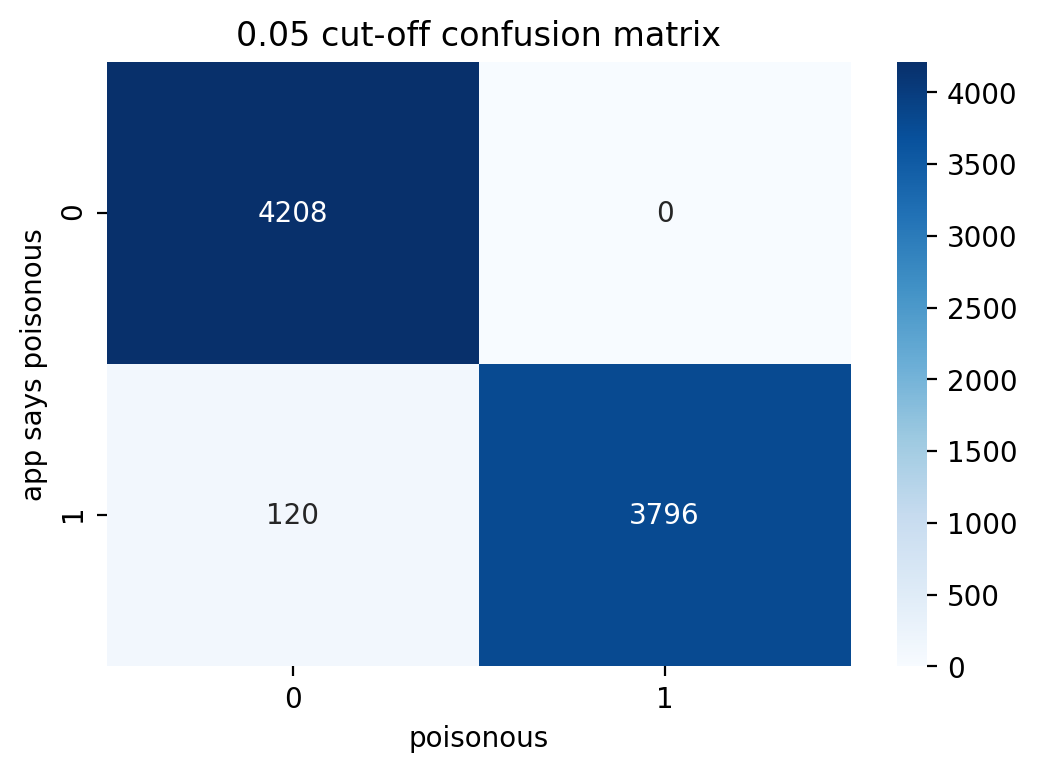

In [30]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(dpi=200)
sns.heatmap(confusion_matrix(odor['y'], odor['p > 0.05']), annot=True, fmt='.4g', cmap='Blues')
plt.xlabel('poisonous')
plt.ylabel('app says poisonous')
plt.title('0.05 cut-off confusion matrix')

Text(0.5, 1.0, '0.01 cut-off confusion matrix')

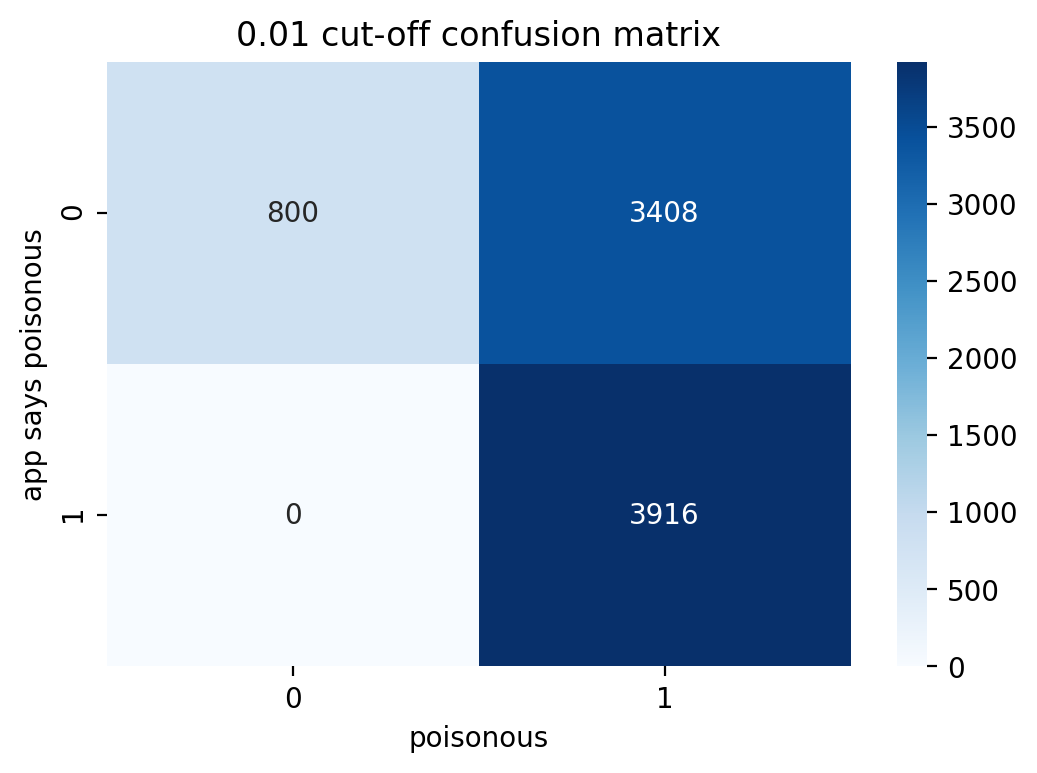

In [31]:
fig, ax = plt.subplots(dpi=200)
sns.heatmap(confusion_matrix(odor['y'], odor['p > 0.01']), annot=True, fmt='.4g', cmap='Blues')
plt.xlabel('poisonous')
plt.ylabel('app says poisonous')
plt.title('0.01 cut-off confusion matrix')

# (i)
* [back to top](#THT3)

In [32]:
_, odor_spore_res, odor_spore = univariate_exploration(df, ['odor', 'spore-print-color'], y)

In [33]:
odor_spore['p > 0.01'] = np.where((odor_spore['p_hat'] > 0.01), 1, 0)
odor_spore['p > 0.05'] = np.where((odor_spore['p_hat'] > 0.05), 1, 0)
odor_spore['p > 0.08'] = np.where((odor_spore['p_hat'] > 0.08), 1, 0)

Text(0.5, 1.0, '0.05 cut-off confusion matrix')

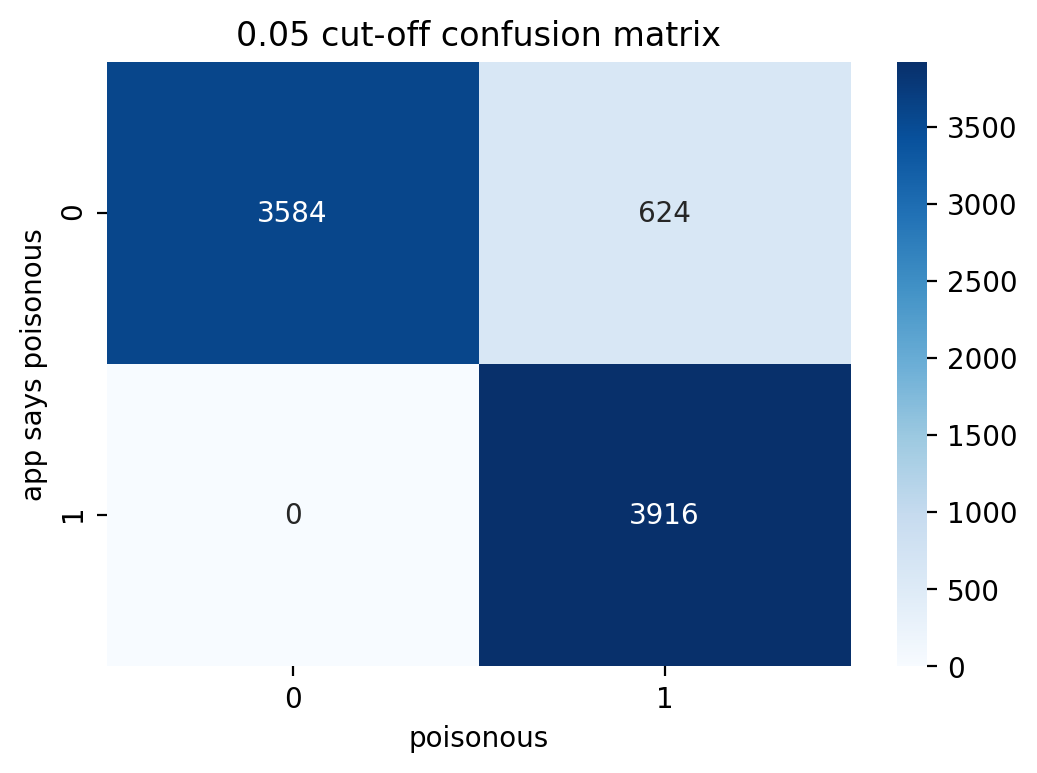

In [34]:
fig, ax = plt.subplots(dpi=200)
sns.heatmap(confusion_matrix(odor_spore['y'], odor_spore['p > 0.05']), annot=True, fmt='.4g', cmap='Blues')
plt.xlabel('poisonous')
plt.ylabel('app says poisonous')
plt.title('0.05 cut-off confusion matrix')

Text(0.5, 1.0, '0.01 cut-off confusion matrix')

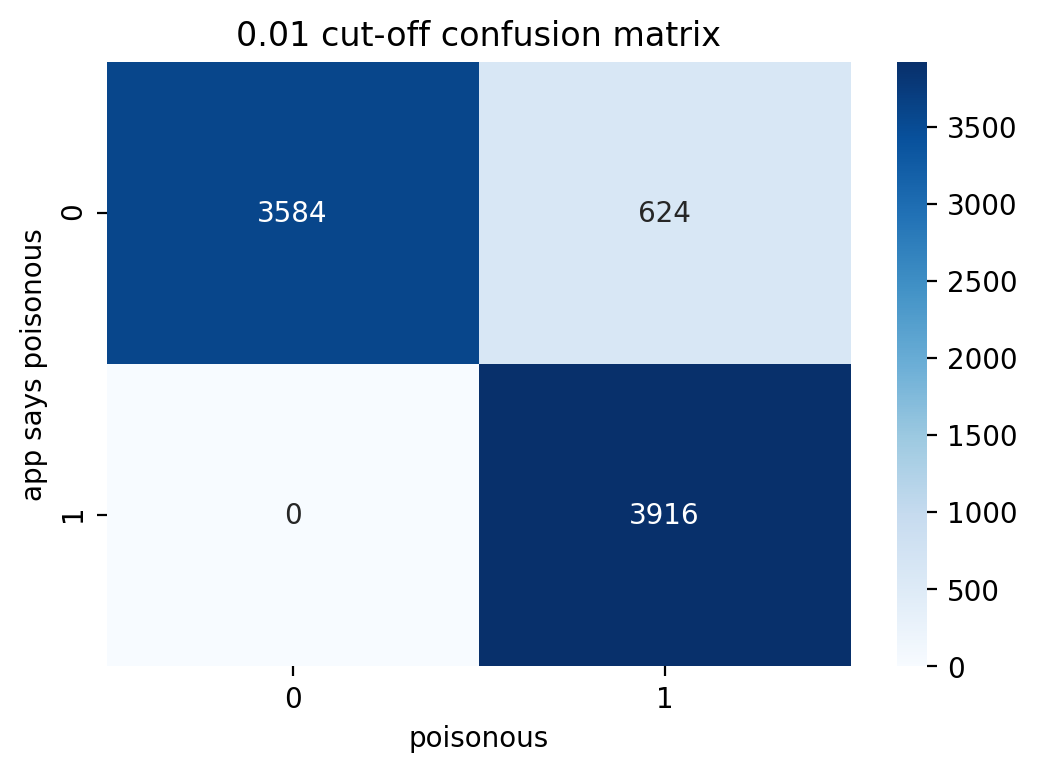

In [35]:
fig, ax = plt.subplots(dpi=200)
sns.heatmap(confusion_matrix(odor_spore['y'], odor_spore['p > 0.01']), annot=True, fmt='.4g', cmap='Blues')
plt.xlabel('poisonous')
plt.ylabel('app says poisonous')
plt.title('0.01 cut-off confusion matrix')

Text(0.5, 1.0, '0.08 cut-off confusion matrix')

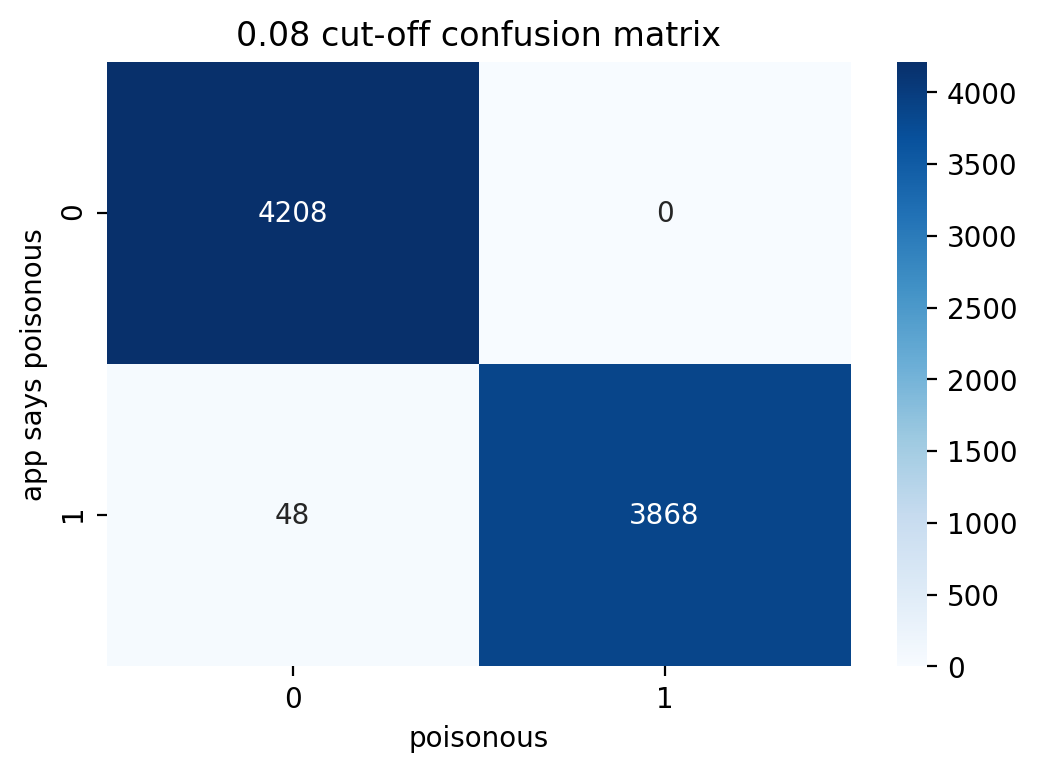

In [36]:
fig, ax = plt.subplots(dpi=200)
sns.heatmap(confusion_matrix(odor_spore['y'], odor_spore['p > 0.08']), annot=True, fmt='.4g', cmap='Blues')
plt.xlabel('poisonous')
plt.ylabel('app says poisonous')
plt.title('0.08 cut-off confusion matrix')